# CELL 0 - run only when emnist or svhn datasest are needed

In [1]:
!pip install kaggle

In [2]:
# copy kaggle.json to /root/.kaggle/ folder so that kaggle cli can access it.
!mkdir /.kaggle
!mv kaggle.json /.kaggle
!mv /.kaggle /root/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download andrewmvd/ocular-disease-recognition-odir5k

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k
License(s): other
 99% 1.60G/1.62G [00:26<00:00, 99.0MB/s]
100% 1.62G/1.62G [00:26<00:00, 65.9MB/s]


In [4]:
!unzip ocular-disease-recognition-odir5k.zip

Datele de ieșire de afișat au fost trunchiate la ultimele 5000 linii.
  inflating: preprocessed_images/2179_left.jpg  
  inflating: preprocessed_images/2179_right.jpg  
  inflating: preprocessed_images/217_left.jpg  
  inflating: preprocessed_images/217_right.jpg  
  inflating: preprocessed_images/2180_left.jpg  
  inflating: preprocessed_images/2180_right.jpg  
  inflating: preprocessed_images/2181_left.jpg  
  inflating: preprocessed_images/2181_right.jpg  
  inflating: preprocessed_images/2182_left.jpg  
  inflating: preprocessed_images/2182_right.jpg  
  inflating: preprocessed_images/2183_left.jpg  
  inflating: preprocessed_images/2183_right.jpg  
  inflating: preprocessed_images/2184_left.jpg  
  inflating: preprocessed_images/2184_right.jpg  
  inflating: preprocessed_images/2185_left.jpg  
  inflating: preprocessed_images/2185_right.jpg  
  inflating: preprocessed_images/2187_left.jpg  
  inflating: preprocessed_images/2187_right.jpg  
  inflating: preprocessed_images/2189_lef

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
imsize=64;
datagen=False
dataset='ocular'

# poreluare etichetare in format df
import pandas as pd
import numpy as np
df = pd.read_csv("/content/full_df.csv")
df.shape[0]

#etichetare clase
def has_normal(text):
    if "normal" in text:
        return 1
    else:
        return 0
def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0
def has_diabetes(text):
    if "retinopathy" in text:
        return 1
    else:
        return 0
def has_glaucoma(text):
    if "glaucoma" in text:
        return 1
    else:
        return 0
def has_degeneration(text):
    if "age-related macular degeneration" in text:
        return 1
    else:
        return 0
def has_hypertension(text):
    if "hypertensive" in text:
        return 1
    else:
        return 0
def has_myopia(text):
    if "pathological myopia" in text:
        return 1
    else:
        return 0

df["left_normal"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_normal(x))
df["right_normal"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_normal(x))
left_normal = df.loc[(df.N ==1) & (df.left_normal == 1)]["Left-Fundus"].values
left_normal
right_normal = df.loc[(df.N ==1) & (df.right_normal == 1)]["Right-Fundus"].values
right_normal
print("Number of images in left normal: {}".format(len(left_normal)))
print("Number of images in right normal: {}".format(len(right_normal)))
print()


df["left_cataract"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df["right_cataract"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
left_cataract = df.loc[(df.C ==1) & (df.left_cataract == 1)]["Left-Fundus"].values
left_cataract
right_cataract = df.loc[(df.C ==1) & (df.right_cataract == 1)]["Right-Fundus"].values
right_cataract
print("Number of images in left cataract: {}".format(len(left_cataract)))
print("Number of images in right cataract: {}".format(len(right_cataract)))
print()


df["left_diabetes"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_diabetes(x))
df["right_diabetes"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_diabetes(x))
left_diabetes = df.loc[(df.D ==1) & (df.left_diabetes == 1)]["Left-Fundus"].values
right_diabetes = df.loc[(df.D ==1) & (df.right_diabetes == 1)]["Right-Fundus"].values
diabetes_images = np.concatenate((left_diabetes, right_diabetes))
print("Number of images in left diabetes: {}".format(len(left_diabetes)))
print("Number of images in right diabetes: {}".format(len(right_diabetes)))
print()


df["left_glaucoma"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_glaucoma(x))
df["right_glaucoma"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_glaucoma(x))
left_glaucoma = df.loc[(df.G ==1) & (df.left_glaucoma == 1)]["Left-Fundus"].values
left_glaucoma
right_glaucoma = df.loc[(df.G ==1) & (df.right_glaucoma == 1)]["Right-Fundus"].values
right_glaucoma
print("Number of images in left glaucoma: {}".format(len(left_glaucoma)))
print("Number of images in right glaucoma: {}".format(len(right_glaucoma)))
print()


df["left_degeneration"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_degeneration(x))
df["right_degeneration"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_degeneration(x))
left_degeneration = df.loc[(df.A ==1) & (df.left_degeneration == 1)]["Left-Fundus"].values
left_degeneration
right_degeneration = df.loc[(df.A ==1) & (df.right_degeneration == 1)]["Right-Fundus"].values
right_degeneration
print("Number of images in left degeneration: {}".format(len(left_degeneration)))
print("Number of images in right degeneration: {}".format(len(right_degeneration)))
print()


df["left_myopia"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_myopia(x))
df["right_myopia"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_myopia(x))
left_myopia = df.loc[(df.M ==1) & (df.left_myopia == 1)]["Left-Fundus"].values
left_myopia
right_myopia = df.loc[(df.M ==1) & (df.right_myopia == 1)]["Right-Fundus"].values
right_myopia
print("Number of images in left myopia: {}".format(len(left_myopia)))
print("Number of images in right myopia: {}".format(len(right_myopia)))
print()


df["left_hypertension"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_hypertension(x))
df["right_hypertension"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_hypertension(x))
left_hypertension = df.loc[(df.H ==1) & (df.left_hypertension == 1)]["Left-Fundus"].values
left_hypertension
right_hypertension = df.loc[(df.H ==1) & (df.right_hypertension == 1)]["Right-Fundus"].values
right_hypertension
print("Number of images in left hypertension: {}".format(len(left_hypertension)))
print("Number of images in right hypertension: {}".format(len(right_hypertension)))
print()


left_abnormalities = df.loc[(df.C ==0) & (df.N ==0) & (df.D ==0) & (df.G ==0) & (df.A ==0)& (df.M ==0) & (df.H ==0)]["Left-Fundus"].sample(250,random_state=42).values
left_abnormalities
right_abnormalities = df.loc[(df.C ==0) & (df.N ==0) & (df.D ==0) & (df.G ==0) & (df.A ==0)& (df.M ==0) & (df.H ==0) ]["Right-Fundus"].sample(250,random_state=42).values
right_abnormalities
print("Number of images in left abnormalities: {}".format(len(left_abnormalities)))
print("Number of images in right abnormalities: {}".format(len(right_abnormalities)))
print()


cataract = np.concatenate((left_cataract,right_cataract),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)
glaucoma = np.concatenate((left_glaucoma,right_glaucoma),axis=0)
diabetes = np.concatenate((left_diabetes,right_diabetes),axis=0)
degeneration = np.concatenate((left_degeneration,right_degeneration),axis=0)
myopia = np.concatenate((left_myopia,right_myopia),axis=0)
hypertension = np.concatenate((left_hypertension,right_hypertension),axis=0)
abnormalities = np.concatenate((left_abnormalities,right_abnormalities),axis=0)

print("Total cataract images: ",len(cataract))
print("Total normal images: ",len(normal))
print("Total galucoma images: ",len(glaucoma))
print("Total diabetes images: ",len(diabetes))
print("Total degeneration images: ",len(degeneration))
print("Total myopia images: ",len(myopia))
print("Total hypertension images: ",len(hypertension))
print("Total abnormalities images: ",len(abnormalities))
print()

def load_odir_data(Array_of_Images):
    Images = []
    Labels = []
    count = -1
    for i in Array_of_Images:
        count += 1
        print(count)
        count1 = 0;
        for j in i:
            count1 += 1
            #empty_Label = np.array([0,0,0,0])
            empty_Label= np.zeros(num_classes)  # pentru un numar arbitrar de clase
            if(j in os.listdir("/content/ODIR-5K/ODIR-5K/Testing Images/")):
                fileName = "/content/ODIR-5K/ODIR-5K/Testing Images/"+j
            elif(j in os.listdir("/content/ODIR-5K/ODIR-5K/Training Images/")):
                fileName = "/content/ODIR-5K/ODIR-5K/Training Images/"+j
            else:
                fileName = "/content/preprocessed_images/"+j
            images = cv2.imread(fileName)
#             print(images.shape)
            images = cv2.resize(images, (imsize,imsize), interpolation = cv2.INTER_NEAREST)
            Images.append(np.array(images))
            empty_Label[count] = 1
            Labels.append(empty_Label)

    return np.array(Images), np.array(Labels)

#--- aici se face o alegere pe maximum de 8 clase (perf. mai proasta)
my_categories=[normal, cataract, glaucoma, myopia, diabetes, hypertension]
#my_categories=[normal, cataract, glaucoma, myopia]  # 4 clase (se pot organiza oricum - cu 6 clase perf. e mai slaba )
#my_categories=[normal, cataract, glaucoma, degeneration, myopia, hypertension]


num_classes=len(my_categories)
import time as ti
t1=ti.time()
Images, Labels = load_odir_data(my_categories)
t2=ti.time()
print('Durata creare baza de date: ', t2-t1, 'secunde',' Numar clase: ', num_classes)

Number of images in left normal: 2100
Number of images in right normal: 2101

Number of images in left cataract: 304
Number of images in right cataract: 290

Number of images in left diabetes: 1689
Number of images in right diabetes: 1759

Number of images in left glaucoma: 332
Number of images in right glaucoma: 284

Number of images in left degeneration: 266
Number of images in right degeneration: 285

Number of images in left myopia: 216
Number of images in right myopia: 241

Number of images in left hypertension: 191
Number of images in right hypertension: 191

Number of images in left abnormalities: 250
Number of images in right abnormalities: 250

Total cataract images:  594
Total normal images:  4201
Total galucoma images:  616
Total diabetes images:  3448
Total degeneration images:  551
Total myopia images:  457
Total hypertension images:  382
Total abnormalities images:  500

0
1
2
3
4
5
Durata creare baza de date:  475.86334705352783 secunde  Numar clase:  6


In [7]:
input_shape=(imsize,imsize,3)
batch_size=16
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Images, Labels, test_size=0.3, random_state=42)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255; x_test /=255  # scalare [0,1]
print('Numar clase: ',np.shape(y_train)[1])
print('Date intrare: ',input_shape)

Numar clase:  6
Date intrare:  (64, 64, 3)


In [8]:
!pip install -U --pre efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.1 MB/s eta 0:00:00


In [9]:
import efficientnet.tfkeras as efn
def get_efficientNet_model():
    enet = efn.EfficientNetB0(
        input_shape=input_shape,
        weights='noisy-student',
        include_top=False
    )

    model = tf.keras.Sequential([
        enet,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    return model
model_name = 'Set2_EfficientNetB0_Keras'

In [10]:
#with strategy.scope():  # if TPU
    # Get the model
model = get_efficientNet_model()

    # Compile the Model
model.compile(
        optimizer='adam',
        loss = 'categorical_crossentropy',
        metrics=['accuracy'],
        #steps_per_execution=16
    )
model.summary()

16696600/16696600 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functiona  (None, 2, 2, 1280)        4049564   
 l)                                                              
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 6)                 7686      
                                                                 
Total params: 4057250 (15.48 MB)
Trainable params: 4015234 (15.32 MB)
Non-trainable params: 42016 (164.12 KB)
_________________________________________________________________


In [11]:
augment=0   # 0 - non-augmented (fast training) 1,2,3 .. various schemes ..
# ----------------------
from tensorflow.keras.preprocessing.image import ImageDataGenerator
if augment==1:
  data_generator = ImageDataGenerator(
                        ### --- useful for FER2013 ---

                          featurewise_center=False,
                          featurewise_std_normalization=False,
                          rotation_range=10,
                          width_shift_range=0.1,
                          height_shift_range=0.1,
                          zoom_range=.1,
                          horizontal_flip=True
                          )

                        #------- useful for CIFAR10 according to https://github.com/moritzhambach/Image-Augmentation-in-Keras-CIFAR-10-
elif augment==2:
  data_generator = ImageDataGenerator(
                          rotation_range=15,
                          horizontal_flip=True,
                          width_shift_range=0.1,
                          height_shift_range=0.1
                        #------------------------------
                         )
elif augment==3:      # Proposed in https://github.com/khanhnamle1994/fashion-mnist/blob/master/CNN-4Conv.ipynb
  data_generator = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)




In [12]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import time as ti
checkpoint = ModelCheckpoint('best_model.h5', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose=1)

In [13]:
epoci=20

t1=ti.time()
if datagen:
  history = model.fit(train_generator, epochs=epoci, validation_data=validation_generator, verbose=1,
                    callbacks = checkpoint)
else:
  history = model.fit(x_train, y_train, epochs=epoci, validation_data=(x_test, y_test), batch_size=batch_size, verbose=1,
                    callbacks = checkpoint)

t2=ti.time()
print('====================================================')
print('Training with  ',epoci,' epochs, lasted  ',int(t2-t1)/60,' minutes')

model=load_model('best_model.h5')
print(model.name)
bp=model.get_weights()  # best weights set
t1=ti.time()
if datagen:
    score = model.evaluate(validation_generator, verbose=0)
else:
    score = model.evaluate(x_test, y_test, verbose=0)
t2=ti.time()

print('--------------  Raport rulare ------------------------')
print ('Marime model (parametri): ',model.count_params())
print('Cea mai buna acuratete pe set validare :', 100*score[1],'%')
print ('Timp predictie pe tot setul de test: ',t2-t1)
print('Set date: ',dataset)
print('Model: ',model_name)
print('Dimensiune imagine: ',imsize)
print('Batch size: ', batch_size)

Epoch 1/20
425/425 [==============================] - ETA: 0s - loss: 1.1792 - accuracy: 0.4973
Epoch 1: val_accuracy improved from -inf to 0.53402, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


425/425 [==============================] - 72s 68ms/step - loss: 1.1792 - accuracy: 0.4973 - val_loss: 1.1389 - val_accuracy: 0.5340
Epoch 2/20
425/425 [==============================] - ETA: 0s - loss: 0.9706 - accuracy: 0.5722
Epoch 2: val_accuracy improved from 0.53402 to 0.57182, saving model to best_model.h5
425/425 [==============================] - 24s 56ms/step - loss: 0.9706 - accuracy: 0.5722 - val_loss: 0.9574 - val_accuracy: 0.5718
Epoch 3/20
425/425 [==============================] - ETA: 0s - loss: 0.8631 - accuracy: 0.6310
Epoch 3: val_accuracy improved from 0.57182 to 0.60619, saving model to best_model.h5
425/425 [==============================] - 23s 55ms/step - loss: 0.8631 - accuracy: 0.6310 - val_loss: 0.9141 - val_accuracy: 0.6062
Epoch 4/20
425/425 [==============================] - ETA: 0s - loss: 0.7992 - accuracy: 0.6653
Epoch 4: val_accuracy improved from 0.60619 to 0.60825, saving model to best_model.h5
425/425 [==============================] - 25s 59ms/ste

In [14]:
file_name = 'best_model.h5'
new_name = f"6_EfficientNetB0_Keras__{int(score[1] * 10000)}.keras"
os.rename(file_name, new_name)

<ipython-input-15-951775051a26>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


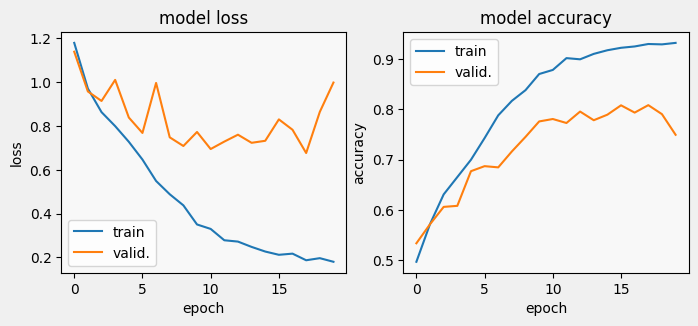

In [15]:
from matplotlib import pyplot as plt
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(7,3), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 121)
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 122)

In [16]:
# Loading the Lowest validation loss Model
model = load_model('/content/6_EfficientNetB0_Keras__8079.keras')
from sklearn.metrics import classification_report, confusion_matrix

if datagen:

    # redefinire batch_size=intregul pachet de date (609 aici) deaorece altfel
    # matricea de confuzie s-ar calcula numai pe un pachet "batch_size =16" si este irelevanta
    test_generator.reset()
    test_generator = test_datagen.flow_from_directory(directory= root_dir+"/test", target_size=(imsize, imsize), batch_size=609, class_mode = 'categorical')

    #val_data.reset()
    t1=ti.time()
    accuracy = model.evaluate(test_generator, batch_size=609)[1]
    t2=ti.time()
    print(f"Acuratete set test = {accuracy*100} %")
    print ('Martime model (parametri): ',model.count_params())
    print('Latenta per intreg set test: ', 1000*(t2-t1), 'mili seconds')
    print('Latenta per sample: ', 1000*(t2-t1)/(609), 'mili seconds')

    for i,j in test_generator:
        print(i.shape, j.shape)
        p = model.predict(i)
        p = p.argmax(-1)
        t = j.argmax(-1)
        print(classification_report(t,p))
        print(confusion_matrix(t,p))
        break;
else:
    labels = (np.dot(y_test, np.array(range(num_classes)).T)).astype('int16')
    import time

    # Calcularea latenței
    start_time = time.time()
    predictions = model.predict(x_test)
    end_time = time.time()

    latency = (end_time - start_time) / len(x_test)

    # Afișarea rezultatelor
    print('Dimensiunea modelului (parametri): ', model.count_params())
    print('Latență per întreg set test: ', 1000 * (end_time - start_time), 'milisecunde')
    print('Latență per eșantion: ', 1000 * latency, 'milisecunde')

    predicted_class_indices = np.argmax(predictions, axis=1)
    confusion_mtx = confusion_matrix(predicted_class_indices, labels)
    print(confusion_mtx)
    print('Classification Report')
    print(classification_report(labels, predicted_class_indices))


91/91 [==============================] - 5s 18ms/step
Dimensiunea modelului (parametri):  4057250
Latență per întreg set test:  6834.20467376709 milisecunde
Latență per eșantion:  2.3485239428752887 milisecunde
[[1096    7   23    6  184   14]
 [  22  175    6    4   14    0]
 [   8    1  131    0   22    2]
 [   0    0    3  123    3    0]
 [ 116    7   16    3  752   40]
 [   9    4    4    0   41   74]]
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1251
           1       0.79      0.90      0.84       194
           2       0.80      0.72      0.76       183
           3       0.95      0.90      0.93       136
           4       0.81      0.74      0.77      1016
           5       0.56      0.57      0.56       130

    accuracy                           0.81      2910
   macro avg       0.79      0.78      0.79      2910
weighted avg       0.81      0.81      0.81      2910



Labeled class : 4.0
1/1 [==============================] - 0s 24ms/step
Recognized class  :  4


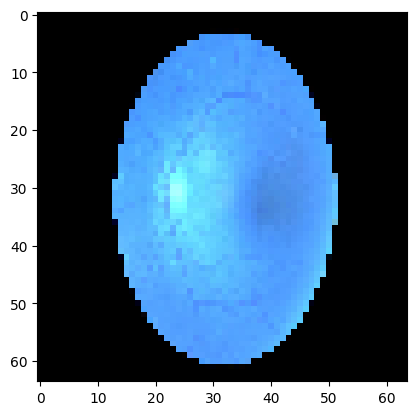

In [25]:
selectia=int(np.shape(x_test)[0]*np.random.rand(1)[0])  #

img1=x_test[selectia,:,:,:]
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
if np.shape(x_train)[3]==1:
  plt.imshow(img1[:,:,0],cmap='gray')
elif np.shape(x_train)[3]==3:
  plt.imshow(img1)

label=np.dot(y_test[selectia,:],1+np.array(range(num_classes)).T)
print('Labeled class :', label-1)
z=model.predict(x_test[selectia:selectia+1,:,:,:])
print('Recognized class  : ',np.argmax(z))